### Load Packages

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa, librosa.display
import numpy as np
import pandas as pd
import librosa.display
import sklearn
import IPython.display as ipd
import seaborn
import scipy
import urllib
from sklearn import preprocessing
plt.rcParams['figure.figsize'] = (14,5)

In [3]:
plt.style.use('seaborn-muted')
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = None

### Load audio files

In [4]:
#Flying Lotus- Tesla Full
flylo_tesla_full = '/content/drive/MyDrive/Music Generator- ML Project- Bootcamp/Audio Files/Artist Recognition/Full Songs/FlyLo_Tesla.wav'
x_flylo, sr_flylo = librosa.load(flylo_tesla_full)

#Wipers- Mystery Full
wipers_mystery_full = '/content/drive/MyDrive/Music Generator- ML Project- Bootcamp/Audio Files/Artist Recognition/Full Songs/Wipers_Mystery.wav'
x_wipers, sr_wipers = librosa.load(wipers_mystery_full)

#DJ Rashad- Drank Kush Full
rashad_kush_full = '/content/drive/MyDrive/Music Generator- ML Project- Bootcamp/Audio Files/Artist Recognition/Full Songs/DJ_Rashad_Drank_Kush.wav'
x_rashad, sr_rashad = librosa.load(rashad_kush_full)

#Flying Lotus Clip
flylo_tesla_clip = '/content/drive/MyDrive/Music Generator- ML Project- Bootcamp/Audio Files/Artist Recognition/Clips/FlyLo_Clip.wav'
x_flylo_clip, sr_flylo_clip = librosa.load(flylo_tesla_clip)

#Wipers Clip
wipers_mystery_clip = '/content/drive/MyDrive/Music Generator- ML Project- Bootcamp/Audio Files/Artist Recognition/Clips/Wipers_Clip.wav'
x_wipers_clip, sr_wipers_clip = librosa.load(wipers_mystery_clip)

#DJ Rashad Clip
rashad_kush_clip = '/content/drive/MyDrive/Music Generator- ML Project- Bootcamp/Audio Files/Artist Recognition/Clips/Rashad_Clip.wav'
x_rashad_clip, sr_rashad_clip = librosa.load(rashad_kush_clip)

#DJ Rashad Clip 2

rashad_full_moon_clip = '/content/drive/MyDrive/Music Generator- ML Project- Bootcamp/Audio Files/Artist Recognition/Clips/DJ_Rashad_Fresh_Moon_Clip.wav'
x_rashad_full_moon_clip, sr_rashad_full_moon_clip = librosa.load(rashad_full_moon_clip)

#FLylo CLip 2
flylo_cadence_test = '/content/drive/MyDrive/Music Generator- ML Project- Bootcamp/Audio Files/Artist Recognition/Clips/Fly_Lo_clip_cadence.wav'
x_flylo_cadence_test, sr_flylo_cadence_test = librosa.load(flylo_cadence_test)

#matthew dear test
matt_dear_test = '/content/drive/MyDrive/Music Generator- ML Project- Bootcamp/Audio Files/Artist Recognition/Clips/matthew_dear_test.wav'
x_matt_dear_test, sr_matt_dear_test = librosa.load(matt_dear_test)




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Play the audio files

In [5]:
#FlyLo

ipd.Audio(x_flylo, rate = sr_flylo)

In [ ]:
#Wipers

ipd.Audio(x_wipers, rate = sr_wipers)

In [ ]:
#DJ Rashad

ipd.Audio(x_rashad, rate = sr_rashad)


### Plot the waveform of the audio signals

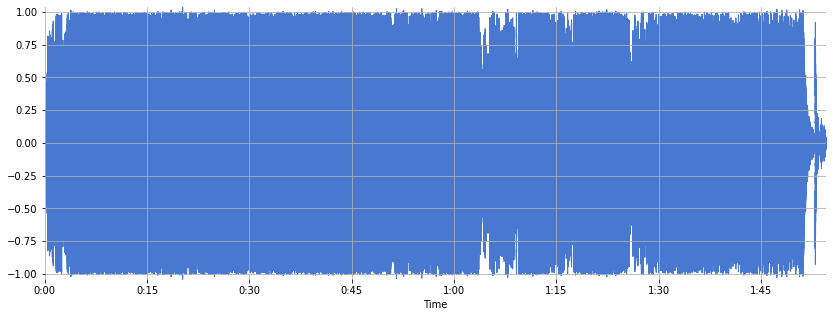

In [18]:
#FlyLo waveform

plt.figure(figsize=(14,5))
librosa.display.waveplot(x_flylo, sr_flylo)



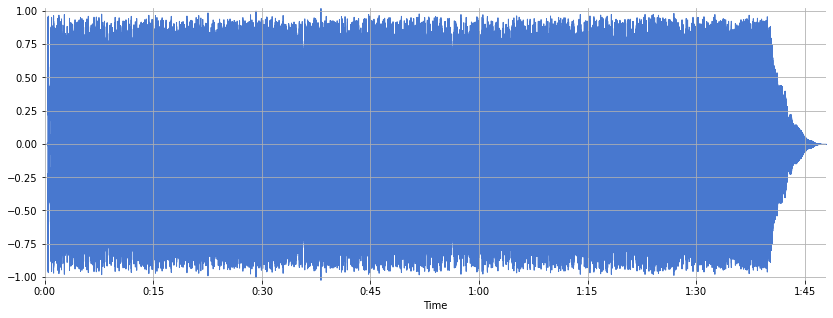

In [95]:
#Wipers waveform

plt.figure(figsize=(14,5))
librosa.display.waveplot(x_wipers, sr_wipers)


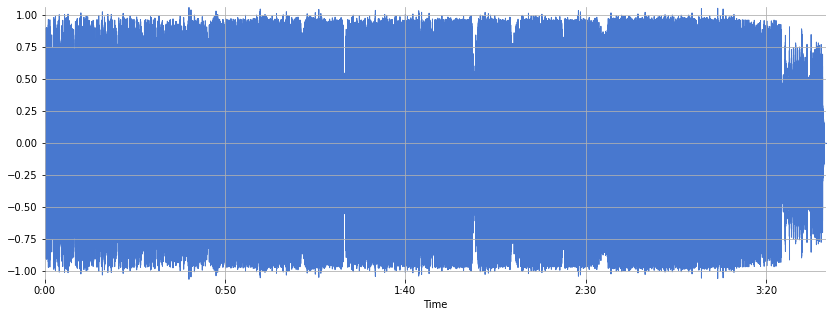

In [20]:
#Rashad waveform

plt.figure(figsize=(14,5))
librosa.display.waveplot(x_rashad, sr_rashad)


### Create a Mel-Spectogram for each file and convert amplitude to decibels

In [96]:
#Flylo Full 
s_flylo = librosa.feature.melspectrogram(x_flylo, sr=sr_flylo, power=2.0)
sdb_flylo = librosa.power_to_db(s_flylo)


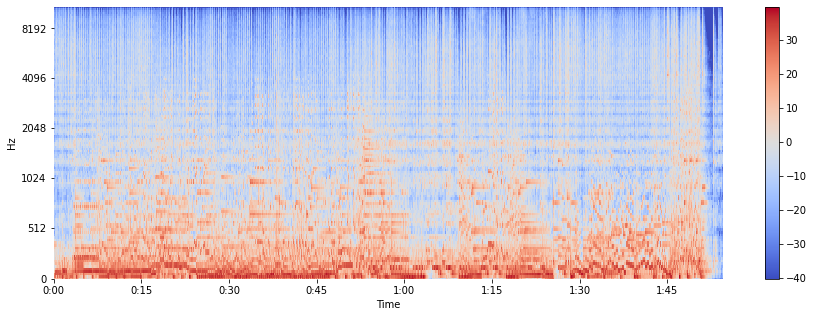

In [97]:
#Flylo Full
plt.figure(figsize=(15,5))
librosa.display.specshow(sdb_flylo, sr=sr_flylo, x_axis='time', y_axis='mel')
plt.colorbar()


In [23]:
#Flylo Clip
s_flylo_clip = librosa.feature.melspectrogram(x_flylo_clip, sr=sr_flylo_clip, power=2.0)
sdb_flylo_clip = librosa.power_to_db(s_flylo_clip)

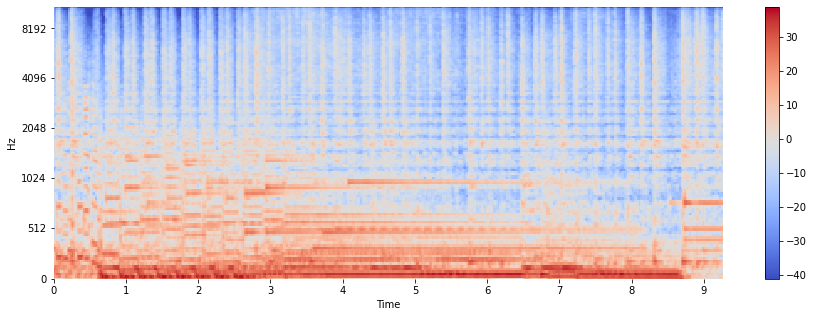

In [24]:
#Flylo Clip
plt.figure(figsize=(15,5))
librosa.display.specshow(sdb_flylo_clip, sr=sr_flylo_clip, x_axis='time', y_axis='mel')
plt.colorbar()

In [98]:
#Wipers
s_wipers = librosa.feature.melspectrogram(x_wipers, sr=sr_wipers, power=2.0)
sdb_wipers = librosa.power_to_db(s_wipers)




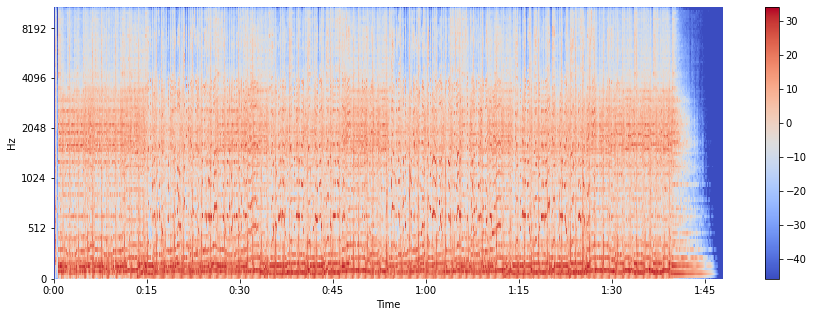

In [99]:
#Wipers
plt.figure(figsize=(15,5))
librosa.display.specshow(sdb_wipers, sr=sr_wipers, x_axis='time', y_axis='mel')
plt.colorbar()

In [100]:
#DJ Rashad
s_rashad = librosa.feature.melspectrogram(x_rashad, sr=sr_rashad, power=2.0)
sdb_rashad = librosa.power_to_db(s_rashad)

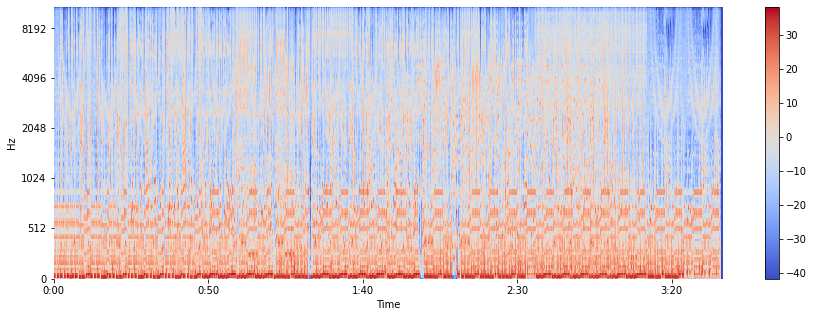

In [101]:
#DJ Rashad
plt.figure(figsize=(15,5))
librosa.display.specshow(sdb_rashad, sr=sr_rashad, x_axis='time', y_axis='mel')
plt.colorbar()


### Extract Features for Flying Lotus

In [102]:
#FlyLo Features at 12 coefficients

n_mfcc = 12
mfcc_flylo = librosa.feature.mfcc(x_flylo, sr=sr_flylo, n_mfcc=n_mfcc).T

In [103]:
mfcc_flylo.shape

(4934, 12)

In [104]:
mfcc_flylo.mean(axis=0)

array([-37.444798  ,  99.73587   ,  15.061332  ,  39.93631   ,
         5.3286166 ,  24.881882  ,  -0.69216126,  12.381081  ,
        -1.3292141 ,  10.14766   ,   0.16925271,   5.519516  ],
      dtype=float32)

In [105]:
mfcc_flylo.std(axis=0)

array([47.631786 , 33.975952 , 17.638252 ,  9.877153 ,  8.286099 ,
        8.514908 ,  7.6368794,  7.235414 ,  7.1876307,  6.35118  ,
        6.7792716,  6.296672 ], dtype=float32)

In [106]:
scaler = sklearn.preprocessing.StandardScaler()

In [107]:
mfcc_flylo_scaled = scaler.fit_transform(mfcc_flylo)

In [108]:
mfcc_flylo_scaled.mean(axis=0)

array([-6.1851599e-09, -1.2370320e-08, -6.1851599e-09, -2.1648059e-08,
       -6.1851599e-09,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
       -6.1851599e-09, -6.1851599e-09,  0.0000000e+00,  9.2777395e-09],
      dtype=float32)

In [109]:
mfcc_flylo_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [110]:
flylo_df = pd.DataFrame(mfcc_flylo_scaled)
flylo_df

0         1         2   ...        9         10        11
0    -8.772071 -2.935484 -0.853902  ... -1.597760 -0.024966 -0.876577
1    -7.100146 -0.255722  1.878841  ... -2.029916 -0.435456 -0.131390
2    -5.001029  0.791878  0.645443  ... -1.394822 -0.421210 -0.655094
3    -4.302850  0.824405  0.455080  ... -1.000573 -0.835176 -1.291070
4    -4.436521  0.773075  0.688247  ... -1.498786 -0.534105 -0.863904
...        ...       ...       ...  ...       ...       ...       ...
4929 -4.236219 -2.230321 -3.067196  ... -0.503060  0.021892 -1.360071
4930 -4.428977 -1.881898 -3.297443  ... -0.479984  0.032468 -1.306806
4931 -4.533042 -1.657327 -3.403647  ...  0.186655  0.864037 -1.411937
4932 -4.702391 -1.511107 -3.356273  ... -0.401196  1.339619 -0.770110
4933 -5.078903 -1.499754 -3.449295  ... -1.154430  1.629188 -0.034341

[4934 rows x 12 columns]

In [111]:
flylo_df['Artist'] = 1

flylo_array = np.asarray(flylo_df)
flylo_array

array([[-8.77207088, -2.93548417, -0.85390162, ..., -0.0249662 ,
        -0.87657666,  1.        ],
       [-7.10014629, -0.25572166,  1.87884104, ..., -0.43545577,
        -0.13139008,  1.        ],
       [-5.00102854,  0.79187769,  0.64544266, ..., -0.42120978,
        -0.65509385,  1.        ],
       ...,
       [-4.53304243, -1.6573267 , -3.40364718, ...,  0.86403745,
        -1.41193724,  1.        ],
       [-4.70239115, -1.51110721, -3.3562727 , ...,  1.33961892,
        -0.77010977,  1.        ],
       [-5.07890272, -1.49975419, -3.44929481, ...,  1.62918806,
        -0.03434068,  1.        ]])

In [112]:

flylo_array.shape

(4934, 13)

### Extract Features for Wipers

In [113]:
mfcc_wipers = librosa.feature.mfcc(x_wipers, sr=sr_wipers, n_mfcc=n_mfcc).T

In [114]:
mfcc_wipers_scaled = scaler.fit_transform(mfcc_wipers)

In [115]:
mfcc_wipers_scaled.mean(axis=0)

array([ 2.625168e-08,  0.000000e+00,  0.000000e+00,  0.000000e+00,
       -4.101825e-09, -6.562920e-09,  2.625168e-08,  6.562920e-09,
       -9.844380e-09,  0.000000e+00,  0.000000e+00, -1.476657e-08],
      dtype=float32)

In [116]:
mfcc_wipers_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [117]:
wipers_df = pd.DataFrame(mfcc_wipers_scaled)

In [118]:
wipers_df['Artist'] = 2

wipers_array = np.array(wipers_df)
wipers_array

array([[-4.86301136, -3.40054035,  1.32837272, ...,  0.45181128,
        -0.33813956,  2.        ],
       [-4.86301136, -3.40054035,  1.32837272, ...,  0.45181128,
        -0.33813956,  2.        ],
       [-4.86301136, -3.40054035,  1.32837272, ...,  0.45181128,
        -0.33813956,  2.        ],
       ...,
       [-4.86301136, -3.40054035,  1.32837272, ...,  0.45181128,
        -0.33813956,  2.        ],
       [-4.86301136, -3.40054035,  1.32837272, ...,  0.45181128,
        -0.33813956,  2.        ],
       [-4.86301136, -3.40054035,  1.32837272, ...,  0.45181128,
        -0.33813956,  2.        ]])

### Extract Features for DJ Rashad

In [119]:
mfcc_rashad = librosa.feature.mfcc(x_rashad, sr=sr_rashad, n_mfcc=n_mfcc).T



In [120]:
mfcc_rashad_scaled = scaler.fit_transform(mfcc_rashad)

In [121]:
mfcc_rashad_scaled.mean(axis=0)

array([ 1.3083635e-08, -1.3083635e-08,  6.5418173e-09,  9.8127257e-09,
       -9.8127257e-09,  6.5418173e-09, -1.3083635e-08, -1.3083635e-08,
       -6.5418173e-09,  9.8127257e-09,  0.0000000e+00, -3.2709087e-09],
      dtype=float32)

In [122]:
mfcc_rashad_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [123]:
rashad_df = pd.DataFrame(mfcc_rashad_scaled)

In [124]:
rashad_df['Artist'] = 3

rashad_array = np.array(rashad_df)
rashad_array

array([[-8.06925964, -2.51726723, -0.87417811, ..., -0.28985915,
        -0.8653881 ,  3.        ],
       [-8.06925964, -2.51726723, -0.87417811, ..., -0.28985915,
        -0.8653881 ,  3.        ],
       [-3.59602976, -0.96156937,  0.39924359, ..., -2.21215153,
        -0.66404712,  3.        ],
       ...,
       [-8.06925964, -2.51726723, -0.87417811, ..., -0.28985915,
        -0.8653881 ,  3.        ],
       [-8.06925964, -2.51726723, -0.87417811, ..., -0.28985915,
        -0.8653881 ,  3.        ],
       [-8.06925964, -2.51726723, -0.87417811, ..., -0.28985915,
        -0.8653881 ,  3.        ]])

In [125]:
#Compare shapes across audio files

print(flylo_array.shape)
print(wipers_array.shape)
print(rashad_array.shape)

(4934, 13)
(4650, 13)
(9330, 13)


### Train the Classifier

In [126]:
#Scale the vectors into one feature table

ft_table = np.vstack((flylo_array, wipers_array, rashad_array))

ft_table.shape

(18914, 13)

In [127]:
ft_table

array([[-8.77207088, -2.93548417, -0.85390162, ..., -0.0249662 ,
        -0.87657666,  1.        ],
       [-7.10014629, -0.25572166,  1.87884104, ..., -0.43545577,
        -0.13139008,  1.        ],
       [-5.00102854,  0.79187769,  0.64544266, ..., -0.42120978,
        -0.65509385,  1.        ],
       ...,
       [-8.06925964, -2.51726723, -0.87417811, ..., -0.28985915,
        -0.8653881 ,  3.        ],
       [-8.06925964, -2.51726723, -0.87417811, ..., -0.28985915,
        -0.8653881 ,  3.        ],
       [-8.06925964, -2.51726723, -0.87417811, ..., -0.28985915,
        -0.8653881 ,  3.        ]])

In [128]:
artists = ft_table[:,12]
artists


array([1., 1., 1., ..., 3., 3., 3.])

In [129]:
# Support Vector Machine
model = sklearn.svm.SVC()

In [130]:
model.fit(ft_table,artists)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Run the classifier

In [131]:
#Compute the MFCCs from audio test clips

mfcc_flylo_clip = librosa.feature.mfcc(x_flylo_clip, sr=sr_flylo_clip, n_mfcc=n_mfcc).T

In [132]:
flylo_cadence_test = librosa.feature.mfcc(x_flylo_cadence_test, sr=sr_flylo_cadence_test, n_mfcc=n_mfcc).T


In [133]:
mfcc_wipers_clip = librosa.feature.mfcc(x_wipers_clip, sr=sr_wipers_clip, n_mfcc=n_mfcc).T


In [134]:
mfcc_rashad_clip = librosa.feature.mfcc(x_rashad_clip, sr=sr_rashad_clip, n_mfcc=n_mfcc).T
mfcc_rashad_moon = librosa.feature.mfcc(x_rashad_full_moon_clip, sr=sr_rashad_full_moon_clip, n_mfcc=n_mfcc).T


In [135]:
dear_test_mfcc = librosa.feature.mfcc(x_matt_dear_test, sr=sr_matt_dear_test, n_mfcc=n_mfcc).T




In [63]:
# print(mfcc_flylo_clip.shape)
# print(mfcc_wipers_clip.shape)
# print(mfcc_rashad_clip.shape)
# print(mfcc_rashad_moon.shape)
# print(flylo_cadence_test.shape)
print(dear_test_mfcc.shape)

(1164, 12)


In [136]:
#Scale the MFCCs using the previous scaler

mfcc_flylo_clip_scaled = scaler.transform(mfcc_flylo_clip)
mfcc_wipers_clip_scaled = scaler.transform(mfcc_wipers_clip)
mfcc_rashad_clip_scaled = scaler.transform(mfcc_rashad_clip)
mfcc_rashad_moon_scaled = scaler.transform(mfcc_rashad_moon)
flylo_two_scaled = scaler.transform(flylo_cadence_test)


In [137]:
dear_test_scaled = scaler.transform(dear_test_mfcc)

In [138]:
dear_test_df = pd.DataFrame(dear_test_scaled)


In [141]:
dear_test_df['Artist'] = 2
dear_array = np.array(dear_test_df)
dear_array.shape

(1164, 13)

In [142]:
flylo_clip_df = pd.DataFrame(mfcc_flylo_clip_scaled)
wipers_clip_df = pd.DataFrame(mfcc_wipers_clip_scaled)
rashad_clip_df = pd.DataFrame(mfcc_rashad_clip_scaled)
rashad_moon_df = pd.DataFrame(mfcc_rashad_moon_scaled)
flylo_two_df = pd.DataFrame(flylo_two_scaled)





In [143]:
flylo_two_df['Artist'] = 1

flylo_array_two = np.array(flylo_two_df)
flylo_array_two

array([[ 0.00894842,  2.51805854, -0.16101524, ..., -0.29691419,
         0.01704223,  1.        ],
       [-0.04689797,  2.67405915, -0.2015565 , ..., -0.97131807,
        -0.55318481,  1.        ],
       [-0.0272522 ,  2.78514767, -0.23220159, ..., -1.41494977,
        -1.03591084,  1.        ],
       ...,
       [ 0.7160092 ,  1.15066493, -0.92931408, ...,  0.46306571,
        -0.98358947,  1.        ],
       [ 0.03971145,  1.76182759, -0.60164446, ...,  0.52837849,
        -1.09044433,  1.        ],
       [-0.1998143 ,  2.49678922, -0.10434123, ...,  0.74477392,
        -0.75993299,  1.        ]])

In [144]:
rashad_moon_df['Artist'] = 3

rashad_moon_array = np.array(rashad_moon_df)
rashad_moon_array

array([[-0.13935442,  2.05004787, -3.60219693, ...,  0.60617346,
        -0.17519839,  3.        ],
       [ 0.05388851,  0.85480362, -2.24184918, ...,  0.64048696,
         0.49967808,  3.        ],
       [-0.25549257,  0.31124499, -1.12879181, ...,  1.39358294,
         0.82951415,  3.        ],
       ...,
       [ 0.93001682, -1.39346743, -5.07804728, ..., -1.83277559,
        -2.44238257,  3.        ],
       [ 0.38069081, -1.10891271, -5.44789743, ..., -1.92282319,
        -2.33294106,  3.        ],
       [ 0.53637075, -0.73681581, -3.4282558 , ..., -1.08006954,
        -1.12404943,  3.        ]])

In [145]:
flylo_clip_df['Artist'] = 1

flylo_clip_array = np.array(flylo_clip_df)
flylo_clip_array

array([[-0.74529004,  0.45345938, -0.31503978, ..., -0.74702919,
        -2.16482067,  1.        ],
       [-0.56568259,  0.92359006, -0.28757492, ..., -0.4662734 ,
        -1.53906643,  1.        ],
       [ 0.64437419, -0.18479677,  0.03570939, ...,  0.08007003,
        -0.24972086,  1.        ],
       ...,
       [-0.08924443, -0.99712116, -1.10457933, ..., -1.28327274,
        -1.26825261,  1.        ],
       [-0.68517333, -0.29810449, -0.95525354, ..., -1.20789909,
        -0.55459934,  1.        ],
       [-0.43410644, -0.81922209, -0.23504271, ..., -1.24184859,
        -0.30038211,  1.        ]])

In [146]:
wipers_clip_df['Artist'] = 2

wipers_clip_array = np.array(wipers_clip_df)
wipers_clip_array

array([[ 0.62178683,  0.76605338, -1.97429752, ..., -0.08669186,
        -1.06458008,  2.        ],
       [ 0.59023052,  0.71725976, -2.19264197, ..., -0.02606235,
        -0.82172716,  2.        ],
       [ 0.64413297,  0.60330766, -2.21266294, ..., -0.63157129,
        -0.90209758,  2.        ],
       ...,
       [ 0.9811852 ,  0.26158687, -1.64144075, ..., -0.29370013,
        -0.16235007,  2.        ],
       [ 1.27154982,  0.16836393, -1.8133508 , ..., -0.09734517,
         0.29077175,  2.        ],
       [ 1.36512971,  0.13790992, -1.99793911, ...,  0.88315183,
         0.49991444,  2.        ]])

In [147]:
rashad_clip_df['Artist'] = 3

rashad_clip_array = np.array(rashad_clip_df)
rashad_clip_array

array([[-0.62138057, -0.59021437,  1.89854407, ..., -0.79185998,
        -0.03145624,  3.        ],
       [-0.73270792, -0.57421422,  1.72441089, ..., -0.9973594 ,
        -0.19576167,  3.        ],
       [-0.8038891 , -0.62065905,  1.64230633, ..., -1.30169797,
         0.10897419,  3.        ],
       ...,
       [ 0.83956707, -0.66522312, -0.66256773, ...,  1.01738381,
        -1.59694469,  3.        ],
       [ 0.39248326, -0.30440238, -0.36477429, ...,  0.63069123,
        -0.86098683,  3.        ],
       [ 0.1639491 , -0.0838327 ,  0.09630491, ...,  0.05577607,
         0.45590037,  3.        ]])

In [148]:
#Cocatenate all the features together

ft_table_clip = np.vstack((flylo_clip_array, wipers_clip_array, rashad_moon_array,flylo_array_two, dear_array))
ft_table_clip

array([[-0.74529004,  0.45345938, -0.31503978, ..., -0.74702919,
        -2.16482067,  1.        ],
       [-0.56568259,  0.92359006, -0.28757492, ..., -0.4662734 ,
        -1.53906643,  1.        ],
       [ 0.64437419, -0.18479677,  0.03570939, ...,  0.08007003,
        -0.24972086,  1.        ],
       ...,
       [ 1.16039562, -0.80071622, -0.70415074, ..., -0.19119604,
        -0.11353123,  2.        ],
       [ 0.79201692, -0.88691878, -0.41464663, ...,  0.10119025,
         0.63881195,  2.        ],
       [ 0.57444328, -0.61397642, -0.08082037, ...,  0.46882078,
         0.55588782,  2.        ]])

In [149]:
artists_clip = ft_table_clip[:,12]


In [150]:
predicted_artists = model.predict(ft_table_clip)

In [151]:
score = model.score(ft_table_clip,artists_clip )
score

0.999645390070922

In [153]:
predict_flylo = model.predict(dear_array)
predict_flylo

array([2., 2., 2., ..., 2., 2., 2.])

In [152]:
predicted_rashad = model.predict(rashad_moon_array)
predicted_rashad

array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3.

In [80]:
predicted_rashad.shape

(398,)

In [81]:
unique_labels, unique_counts = np.unique(predicted_rashad, return_counts=True)

In [82]:
unique_labels, unique_counts

(array([1., 3.]), array([  1, 397]))

In [83]:
predicted_labels = model.predict(flylo_clip_array)

In [84]:
predicted_labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.